## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on ="Mouse ID",how = "inner")

# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
No_of_mouse = len(combined_df["Mouse ID"].unique())
print(f"{No_of_mouse} were tested in this experiment.")

249 were tested in this experiment.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

temp_df=combined_df.groupby(["Mouse ID","Timepoint"]).count().reset_index()

# Generate a list of mice with duplicated data 
# mouse is deemed to have duplicate data if mouse have more than 1 unique value of Mouse ID_Timepoint 

temp_df=temp_df.loc[temp_df["Drug Regimen"]>1]
drop_mouse=temp_df["Mouse ID"].unique()
print(drop_mouse)
    

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

df_dup_mouse = combined_df.loc[combined_df["Mouse ID"].isin(drop_mouse)]
df_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"].isin(drop_mouse)==False]
clean_df = clean_df.reset_index()
clean_df=clean_df.drop(labels=['index'], axis=1)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a list of the unique Drug Regimen
reg_list = clean_df["Drug Regimen"].unique()
print(f"Drug Regimen List")
print(reg_list)
print("")
# Create a list of unique Mouse ID 
Mouse_list = clean_df["Mouse ID"].unique()
print(f"Mice List")
print(Mouse_list)

Drug Regimen List
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']

Mice List
['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'h246' 'h333' 'h428'
 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365' 'j755'
 'j9

In [7]:
# Checking the number of mice in the clean DataFrame.
No_of_mouse_clean = len(clean_df["Mouse ID"].unique())
print(f"{No_of_mouse_clean} were tested in this experiment, without duplicated time data.")

248 were tested in this experiment, without duplicated time data.


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

Reg_list = clean_df["Drug Regimen"].unique()

mean_list = [np.mean(clean_df.loc[clean_df["Drug Regimen"]== reg ]["Tumor Volume (mm3)"]) for reg in Reg_list]
median_list = [np.median(clean_df.loc[clean_df["Drug Regimen"]== reg ]["Tumor Volume (mm3)"]) for reg in Reg_list]
var_list = [np.var(clean_df.loc[clean_df["Drug Regimen"]== reg ]["Tumor Volume (mm3)"]) for reg in Reg_list]
std_list = [np.std(clean_df.loc[clean_df["Drug Regimen"]== reg ]["Tumor Volume (mm3)"]) for reg in Reg_list]
sem_list = [sts.sem(clean_df.loc[clean_df["Drug Regimen"]== reg ]["Tumor Volume (mm3)"])for reg in Reg_list]

df_stat_summary = pd.DataFrame({"Drug Regimen":Reg_list,
                                "Mean":mean_list,
                                "Median":median_list,
                                "Variance":var_list,
                                "Standard Deviation":std_list,
                                "Standard Error of Mean":sem_list})
df_stat_summary


,Drug Regimen,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
8,Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# This method produces everything in a single groupby function

# create a dataframe with only drug regiment and tumor column
tumor_df=clean_df[["Drug Regimen","Tumor Volume (mm3)"]]

# Calculate each column of data using groupby and put it in a dataframe
df_stat_summary=pd.DataFrame(index=(tumor_df.groupby("Drug Regimen").mean().reset_index())["Drug Regimen"])
df_stat_summary["Mean"]=tumor_df.groupby("Drug Regimen").mean()
df_stat_summary["Median"]=tumor_df.groupby("Drug Regimen").median()
df_stat_summary["Variance"]=tumor_df.groupby("Drug Regimen").var()
df_stat_summary["Standard Deviation"]=tumor_df.groupby("Drug Regimen").std()
df_stat_summary["Standard Error of Mean"]=tumor_df.groupby("Drug Regimen").sem()
df_stat_summary



,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

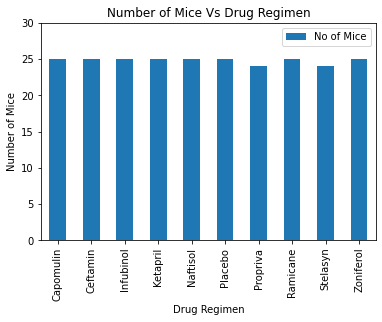

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
# using pandas. 

#Create a Dataframe with only 1 entry per Mouse ID
unique_MouseID_df = clean_df.drop_duplicates(subset=['Mouse ID'])

# Group data by Drug Regimen and count number of each entry
panda_bar_df=unique_MouseID_df.groupby("Drug Regimen").count()

# Retain only 1 column of data in the Dataframe and Rename the column
panda_bar_df= panda_bar_df[["Mouse ID"]]
panda_bar_df = panda_bar_df.rename(columns={"Mouse ID":"No of Mice"})

# Plot Bar graph using Dataframe and Panda Method
panda_bar_df.plot(kind="bar")
plt.title("Number of Mice Vs Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0,30)
plt.show()

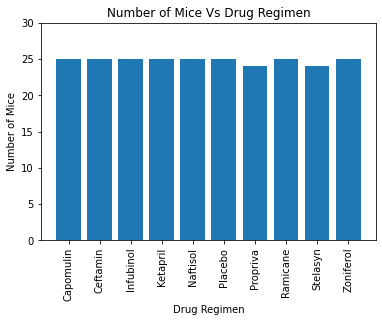

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
# using pyplot.

plt.bar(panda_bar_df.index,panda_bar_df["No of Mice"])
plt.title("Number of Mice Vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0,30)
plt.xticks(rotation=90)
plt.show()

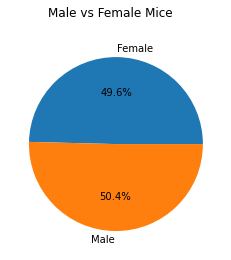

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Extract 2 columns from 'unique_MouseID_df' DataFrame
pie_df = unique_MouseID_df[['Mouse ID','Sex']]
pie_df=pie_df.groupby("Sex").count()

# Create Panda Pie Plot
pie_df.plot(kind="pie",subplots=True,legend = False,ylabel="",autopct="%1.1f%%",title="Male vs Female Mice")
plt.show()

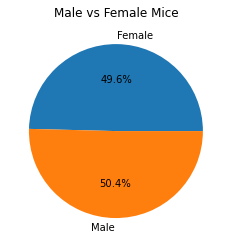

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(pie_df["Mouse ID"],labels=pie_df.index,autopct="%1.1f%%")
plt.title("Male vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
Last_Entry_df = clean_df.groupby("Mouse ID").max().reset_index()
Last_Entry_df = Last_Entry_df[["Mouse ID","Timepoint"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Final_tumor_df = pd.merge(Last_Entry_df,clean_df,on=["Mouse ID","Timepoint"],how="inner")

# Create empty Dataframe for Drug Regimen to be analysed
Final_tumor_df_top4 = pd.DataFrame({'Mouse ID':[], 
                               'Timepoint':[], 
                               'Drug Regimen':[], 
                               'Sex':[], 
                               'Age_months':[],
                               'Weight (g)':[], 
                               'Tumor Volume (mm3)':[], 
                               'Metastatic Sites':[]})

# Create a treatment list for the 4 treatment regimens
Treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter and append to create dataframe of the top 4 drug regimen
for Treatment in Treatment_list:
    temp_df = Final_tumor_df.loc[(Final_tumor_df["Drug Regimen"]== Treatment)]
    Final_tumor_df_top4=Final_tumor_df_top4.append(temp_df,ignore_index=True)
Final_tumor_df_top4

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45.0,Capomulin,Female,9.0,22.0,38.982878,2.0
1,b742,45.0,Capomulin,Male,7.0,21.0,38.939633,0.0
2,f966,20.0,Capomulin,Male,16.0,17.0,30.485985,0.0
3,g288,45.0,Capomulin,Male,3.0,19.0,37.074024,1.0
4,g316,45.0,Capomulin,Female,22.0,22.0,40.159220,2.0
...,...,...,...,...,...,...,...,...
95,x226,0.0,Ceftamin,Male,23.0,28.0,45.000000,0.0
96,x581,45.0,Ceftamin,Female,19.0,28.0,64.634949,3.0
97,x822,45.0,Ceftamin,Male,3.0,29.0,61.386660,3.0
98,y769,45.0,Ceftamin,Female,6.0,27.0,68.594745,4.0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list

# Extract 2 columns from Final_tumor_df_top4 dataframe
top4_tumor_vol = Final_tumor_df_top4[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
top4_tumor_vol


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = [top4_tumor_vol.loc[top4_tumor_vol.index==Treatment].quantile([.25,.5,.75]) for Treatment in Treatment_list]
lowerq = [quartiles[x].loc[0.25]["Tumor Volume (mm3)"] for x in range(0,len(Treatment_list))]
upperq = [quartiles[x].loc[0.75]["Tumor Volume (mm3)"] for x in range(0,len(Treatment_list))]
iqr = [quartiles[x].loc[0.75]["Tumor Volume (mm3)"] - quartiles[x].loc[0.25]["Tumor Volume (mm3)"] for x in range(0,len(Treatment_list))]
lower_bound = [lowerq[x] - (1.5*iqr[x]) for x in range(0,len(Treatment_list))]
upper_bound = [upperq[x] + (1.5*iqr[x]) for x in range(0,len(Treatment_list))]

# Create Dataframe to summaries quartile data
quar_df=pd.DataFrame(data={"Drug Regimen":Treatment_list,
                           "Lower Quartile":lowerq,
                           "Upper Quartile":upperq,
                           "Interquartile Range":iqr,
                           "Lower Bound":lower_bound,
                           "Upper Bound":upper_bound})

# Calculate Upper outlier
Upper_outliers=[]
Upper_outliers=[top4_tumor_vol.loc[(top4_tumor_vol["Tumor Volume (mm3)"]>upper_bound[x]) & 
                   (top4_tumor_vol.index==Treatment_list[x])] for x in range(0,len(Treatment_list))]
Total_Upper_Outliers = [Upper_outliers[x]["Tumor Volume (mm3)"].count() for x in range(0,len(Treatment_list))]
sum_Upper_Outliers=sum(Total_Upper_Outliers)

# Calculate lower outlier
lower_outliers=[]
lower_outliers=[top4_tumor_vol.loc[(top4_tumor_vol["Tumor Volume (mm3)"]<lower_bound[x]) & 
                   (top4_tumor_vol.index==Treatment_list[x])] for x in range(0,len(Treatment_list))]
Total_lower_Outliers = [lower_outliers[x]["Tumor Volume (mm3)"].count() for x in range(0,len(Treatment_list))]
sum_lower_Outliers=sum(Total_lower_Outliers)

# Add upper and lower outlier to the summary Dataframe
quar_df["Upper Outliers"]=Total_Upper_Outliers
quar_df["Lower Outliers"]=Total_lower_Outliers

# Calculate and print the total amount of outliers
sum_outliers = sum_lower_Outliers + sum_Upper_Outliers
print(f"There are a total of {sum_outliers} outliers")
quar_df


There are a total of 1 outliers


,Drug Regimen,Lower Quartile,Upper Quartile,Interquartile Range,Lower Bound,Upper Bound,Upper Outliers,Lower Outliers
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,0,0
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,0,0
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,0,1
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,0,0


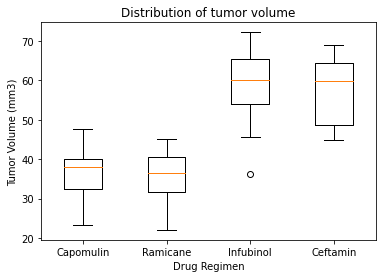

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create appended list for plotting
box_plot_list = []
for Treatment in Treatment_list:
    box_plot_list.append(top4_tumor_vol.loc[top4_tumor_vol.index == Treatment ]["Tumor Volume (mm3)"].tolist())

# Plot boxplot
plt.boxplot(box_plot_list,labels=Treatment_list)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of tumor volume")
plt.show()



## Line and Scatter Plots

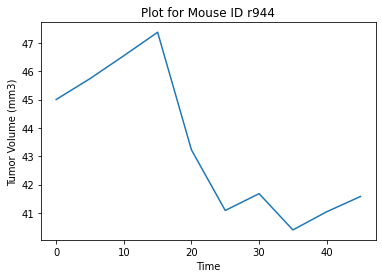

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Extract a unique list of mice using the Capomulin Drug Regimen
Capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]["Mouse ID"].unique()

# Randomly choose a Mouse ID from the list
chosen_mouse = Capomulin_mouse[random.randrange(0,int(len(Capomulin_mouse)))]

# Extract data jof the chosen mouse
chosen_mouse_df = clean_df.loc[clean_df["Mouse ID"]==chosen_mouse]

# Plot line plot of the chosen mouse
plt.plot(chosen_mouse_df["Timepoint"],chosen_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Plot for Mouse ID {chosen_mouse}")
plt.show()

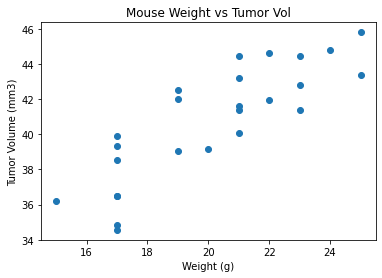

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_vs_tumor = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()

x_values = weight_vs_tumor['Weight (g)']
y_values = weight_vs_tumor['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Vol")
plt.show()

## Correlation and Regression

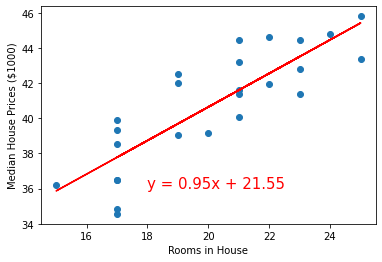

The correlation r squared value is 0.71


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()
print(f"The correlation r squared value is {round(rvalue**2,2)}")